# Cleaning the Bios
Vectorizing the bios

### Importing Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

### Loading the Data

In [72]:
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

## Cleaning the Text

In [61]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [62]:
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    

In [63]:
df['Bios'] = df.Bios.apply(tokenize)

### Most Frequent Words

In [64]:
total_vocab = set()

for bio in df['Bios']:
    total_vocab.update(bio)
        
print("Number of unique words: ",len(total_vocab))

Number of unique words:  104


In [65]:
# Determining the most frequent words in user bios
words = []

for bio in df['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)

[('fanatic', 2241),
 ('travel', 1737),
 ('music', 1681),
 ('food', 1657),
 ('social', 1654),
 ('zombie', 1652),
 ('pop', 1645),
 ('tv', 1636),
 ('twitter', 1622),
 ('coffee', 1617),
 ('web', 1612),
 ('beer', 1605),
 ('bacon', 1585),
 ('medium', 1577),
 ('alcohol', 1574),
 ('culture', 1572),
 ('internet', 1534),
 ('expert', 1183),
 ('geek', 1165),
 ('buff', 1164),
 ('lover', 1159),
 ('guru', 1158),
 ('fan', 1157),
 ('ninja', 1143),
 ('scholar', 1142),
 ('trailblazer', 1138),
 ('maven', 1137),
 ('junkie', 1134),
 ('specialist', 1119),
 ('advocate', 1116),
 ('enthusiast', 1108),
 ('practitioner', 1105),
 ('nerd', 1101),
 ('aficionado', 1099),
 ('evangelist', 1092),
 ('introvert', 861),
 ('gamer', 853),
 ('reader', 850),
 ('communicator', 829),
 ('writer', 815),
 ('creator', 815),
 ('student', 808),
 ('explorer', 806),
 ('thinker', 805),
 ('analyst', 804),
 ('certified', 793),
 ('troublemaker', 787),
 ('general', 786),
 ('organizer', 781),
 ('problem', 770),
 ('solver', 770),
 ('devoted', 

### Plotting the Most Frequent Words

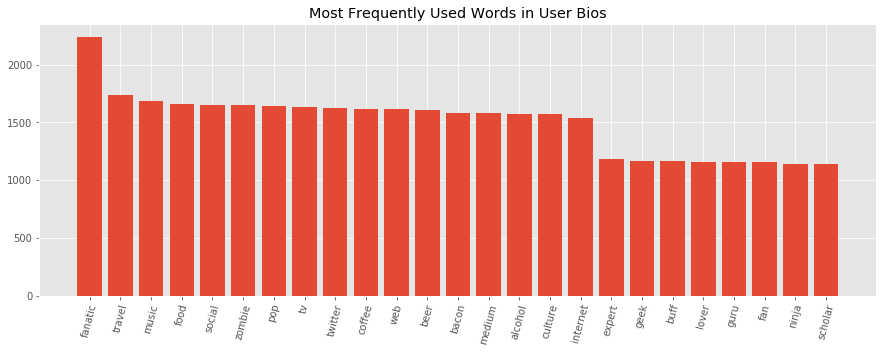

In [66]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

It would possibly be best to create some bigrams with this data as most of the words appear to be adjectives.

## Bigrams

In [67]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

In [68]:
# Top 50 most common bigrams
bio_scored[:50]

[(('social', 'medium'), 0.019017184202592706),
 (('pop', 'culture'), 0.018956888754899006),
 (('problem', 'solver'), 0.009285498944829666),
 (('subtly', 'charming'), 0.008525776303889057),
 (('infuriatingly', 'humble'), 0.00763340367802231),
 (('future', 'teen'), 0.002568586071751583),
 (('teen', 'idol'), 0.002568586071751583),
 (('fit', 'apathy'), 0.0025082906240578838),
 (('prone', 'fit'), 0.0025082906240578838),
 (('fall', 'lot'), 0.002496231534519144),
 (('animal', 'everywhere'), 0.002411817907747965),
 (('friend', 'animal'), 0.002411817907747965),
 (('music', 'fanatic'), 0.0022309315646668678),
 (('zombie', 'fanatic'), 0.002206813385589388),
 (('travel', 'fanatic'), 0.002194754296050648),
 (('medium', 'fanatic'), 0.0021103406692794696),
 (('boxing', 'glove'), 0.0020982815797407294),
 (('type', 'boxing'), 0.0020982815797407294),
 (('unable', 'type'), 0.0020982815797407294),
 (('food', 'fanatic'), 0.001989749773892071),
 (('internet', 'fanatic'), 0.001977690684353331),
 (('culture',

In [69]:
# Filtering out bigrams based on frequency of occurence
bio_finder.apply_freq_filter(20)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi = bio_finder.score_ngrams(bigram_meas.pmi)

In [70]:
bio_pmi

[(('boxing', 'glove'), 8.89657599071402),
 (('type', 'boxing'), 8.89657599071402),
 (('unable', 'type'), 8.89657599071402),
 (('animal', 'everywhere'), 8.695663296788021),
 (('friend', 'animal'), 8.695663296788021),
 (('fall', 'lot'), 8.646032529063424),
 (('fit', 'apathy'), 8.639079768421656),
 (('prone', 'fit'), 8.639079768421656),
 (('future', 'teen'), 8.604809866336904),
 (('teen', 'idol'), 8.604809866336904),
 (('infuriatingly', 'humble'), 7.033457797134407),
 (('subtly', 'charming'), 6.873953081753346),
 (('problem', 'solver'), 6.750804850980483),
 (('pop', 'culture'), 5.655647617940144),
 (('pop', 'cultureaholic'), 5.655647617940144),
 (('social', 'mediaholic'), 5.647775967391471),
 (('social', 'medium'), 5.647775967391471),
 (('tv', 'scholar'), 2.2476825046593056),
 (('unapologetic', 'organizer'), 2.200519801892071),
 (('alcohol', 'maven'), 2.1976397422426217),
 (('bacon', 'aficionado'), 2.192239191307902),
 (('tv', 'maven'), 2.1849712567002477),
 (('food', 'lover'), 2.16693646

## Vectorizing

In [76]:
vectorizer = TfidfVectorizer()

df['Bios'] = df.Bios.apply(lambda x: TfidfVectorizer.fit_transform(x))

TypeError: fit_transform() missing 1 required positional argument: 'raw_documents'

In [74]:
df['Bios']

<6600x110 sparse matrix of type '<class 'numpy.float64'>'
	with 85475 stored elements in Compressed Sparse Row format>